In [1]:
# Celda 1: Importaciones y Configuración del Path

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Añadir el directorio raíz del proyecto al sys.path
# Esto permite que el notebook encuentre los módulos en la carpeta 'src'
# Usamos '..' para "subir un nivel" desde la carpeta 'notebooks' a la raíz del proyecto.
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Ahora que el path está configurado, podemos importar nuestros módulos
from src.repository import DataRepository

print("Módulos importados y path configurado correctamente.")

Módulos importados y path configurado correctamente.


In [2]:
# Celda 2: Inicializar el Repositorio
# La primera vez que se llame, se creará la conexión.
print("Inicializando el repositorio...")
repo = DataRepository()
print("Repositorio listo.")

Inicializando el repositorio...
Creando una nueva instancia de DatabaseConnection...
Repositorio listo.


In [3]:
# Celda 3: Obtener los datos
# Aquí no hay SQL, solo una llamada a un método claro y legible.
print("\nObteniendo resumen de ventas por país...")
sales_summary_df = repo.get_sales_summary_by_country()
print(type(sales_summary_df))


Obteniendo resumen de ventas por país...
<class 'pandas.core.frame.DataFrame'>


In [4]:
# Celda 4: Mostrar los resultados
print("\nResumen de Ventas por País:")
display(sales_summary_df)


Resumen de Ventas por País:


,countryname,totaltransactions,totalrevenue
0,United States,50000,7863619.0


C:\Users\CTI23994\AppData\Local\Temp\ipykernel_2648\529220211.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_summary_df, x='totalrevenue', y='countryname', palette='viridis')


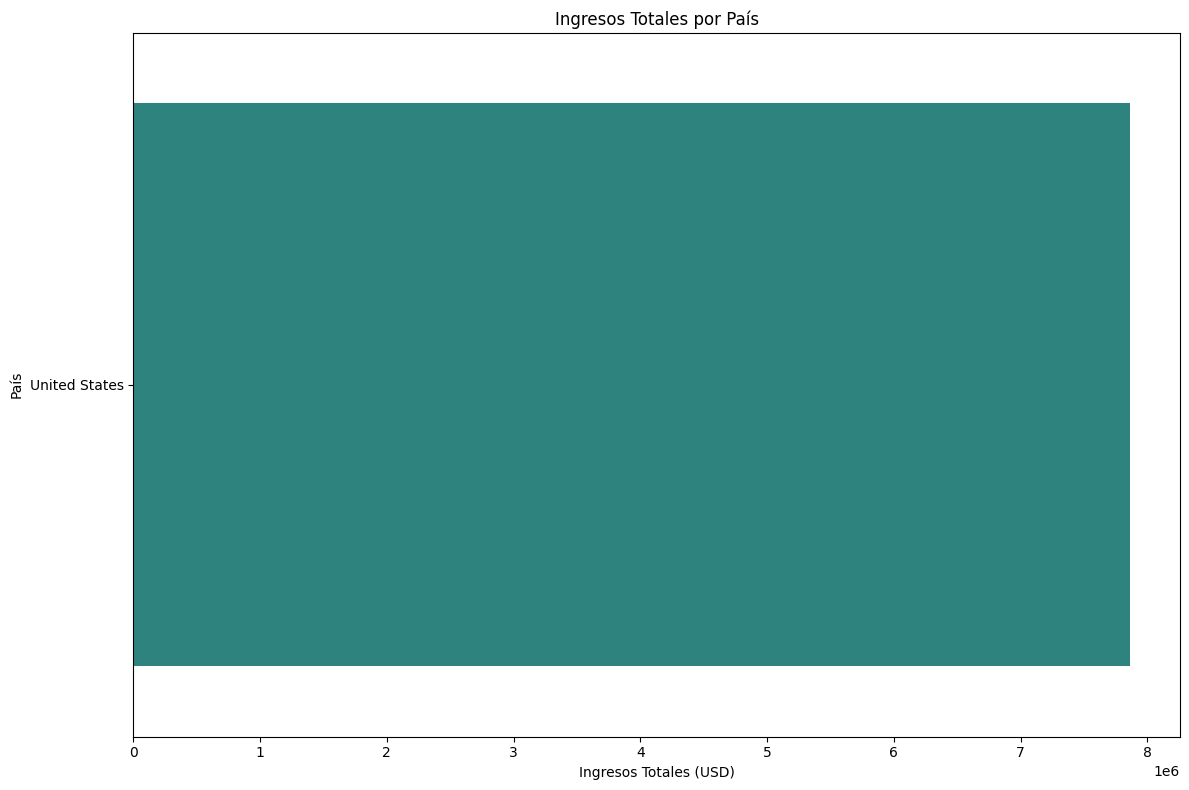

In [5]:
# Celda 5: Visualizar los resultados
if not sales_summary_df.empty:
    plt.figure(figsize=(12, 8))
    sns.barplot(data=sales_summary_df, x='totalrevenue', y='countryname', palette='viridis')
    plt.title('Ingresos Totales por País')
    plt.xlabel('Ingresos Totales (USD)')
    plt.ylabel('País')
    plt.tight_layout()
    plt.show()

In [6]:
# ====================================================================
# Fase 3
# ====================================================================

In [ ]:
# ====================================================================
# Ranking de Productos
# ====================================================================

print("Obteniendo el top 3 de productos por categoría...")
top_products_df = repo.get_top_products_per_category(limit=3)

print("Resultado:")
display(top_products_df)

Obteniendo el top 3 de productos por categoría...
Resultado:


,categoryname,productname,totalquantitysold
0,Beverages,Garlic - Primerba; Paste,1937
1,Cereals,Brandy - Bar,1904
2,Confections,Sprouts - Alfalfa,1910
3,Dairy,Nantucket - Pomegranate Pear,1657
4,Grain,Creme De Banane - Marie,1611
5,Meat,Bread - Italian Roll With Herbs,1916
6,Poultry,Campari,1773
7,Produce,Guinea Fowl,1875
8,Seafood,Wine - Fume Blanc Fetzer,1713
9,Shell fish,Cake - Box Window 10x10x2.5,1882


In [8]:
# ====================================================================
# Crecimiento Mensual
# ====================================================================

print("Calculando el crecimiento de ventas mensual...")
growth_df = repo.get_monthly_sales_growth()

# Formatear para mejor visualización
if not growth_df.empty:
    growth_df['monthlyrevenue'] = growth_df['monthlyrevenue'].map('${:,.2f}'.format)
    growth_df['previousmonthrevenue'] = growth_df['previousmonthrevenue'].map('${:,.2f}'.format)
    growth_df['growthpercentage'] = growth_df['growthpercentage'].map('{:.2f}%'.format)

print("Resultado:")
display(growth_df)

Calculando el crecimiento de ventas mensual...
Resultado:


,salemonth,monthlyrevenue,previousmonthrevenue,growthpercentage


In [9]:
# ====================================================================
# Reporte de Cliente
# ====================================================================

customer_id_to_check = 80528  # Podemos cambiar este ID para probar diferentes clientes
print(f"Generando reporte para el cliente con ID: {customer_id_to_check}...")
customer_report_df = repo.get_customer_report(customer_id=customer_id_to_check)

print("Resultado:")
display(customer_report_df)

Generando reporte para el cliente con ID: 80528...
Resultado:


,nombre_completo,ciudad,total_gastado,total_compras,fecha_ultima_compra,categoria_favorita
0,Trisha Morrison,San Antonio,42.0,1,None,Poultry
